In [112]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.io import loadmat
from keras.utils import to_categorical

In [113]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [114]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [115]:
x_test.shape

(10000, 28, 28, 1)

In [116]:
X_train = x_train[0:45000]
Y_train = y_train[0:45000]
X_valid = x_train[45000:]
Y_valid = y_train[45000:]
X_test = x_test
Y_test = y_test

In [117]:
X_train.shape

(45000, 28, 28, 1)

In [118]:
def fe_data(df, target):
    # FE: scaling data ant transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

In [119]:
X_train, Y_train = fe_data(X_train, Y_train)
X_valid, Y_valid = fe_data(X_valid, Y_valid)
X_test, Y_test = fe_data(X_test, Y_test)

In [120]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

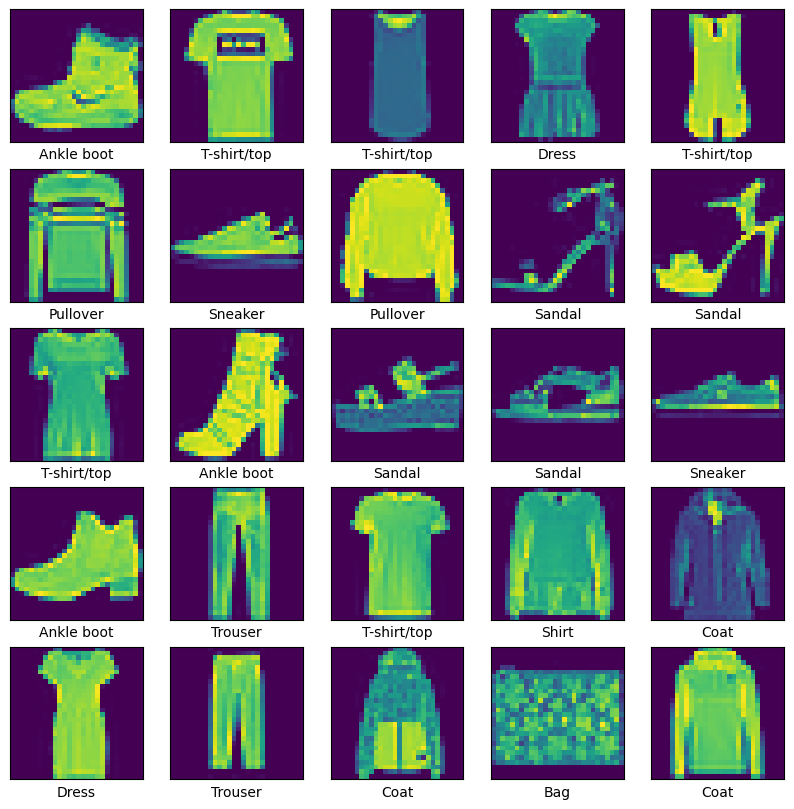

In [49]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
plt.show()

# Model

In [71]:
model = models.Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization()) 
model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization()) 
model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [73]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metrics)

In [74]:
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid), batch_size = 64)

Epoch 1/10
704/704 [==============================] - 61s 83ms/step - loss: 0.4785 - accuracy: 0.8302 - precision: 0.8754 - recall: 0.7900 - val_loss: 0.3291 - val_accuracy: 0.8803 - val_precision: 0.9080 - val_recall: 0.8547
Epoch 2/10
704/704 [==============================] - 51s 72ms/step - loss: 0.2980 - accuracy: 0.8948 - precision: 0.9159 - recall: 0.8733 - val_loss: 0.2588 - val_accuracy: 0.9043 - val_precision: 0.9214 - val_recall: 0.8903
Epoch 3/10
704/704 [==============================] - 60s 85ms/step - loss: 0.2487 - accuracy: 0.9098 - precision: 0.9264 - recall: 0.8941 - val_loss: 0.2637 - val_accuracy: 0.9058 - val_precision: 0.9230 - val_recall: 0.8899
Epoch 4/10
704/704 [==============================] - 58s 83ms/step - loss: 0.2229 - accuracy: 0.9202 - precision: 0.9345 - recall: 0.9074 - val_loss: 0.2971 - val_accuracy: 0.8906 - val_precision: 0.9056 - val_recall: 0.8788
Epoch 5/10
704/704 [==============================] - 54s 77ms/step - loss: 0.1938 - accuracy: 0

In [ ]:
# with validation_data epochs = 5,  acc = 0.90, evaluate = 0.9028
# without validation_data epochs = 5, acc = 0.9252  evaluate = 0.9089

In [77]:
# Print test prediction accuracy
test_loss, test_acc, precision, recall = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

313/313 - 2s - loss: 0.3665 - accuracy: 0.8812 - precision: 0.8996 - recall: 0.8699 - 2s/epoch - 7ms/step
test accuracy: 0.8812000155448914


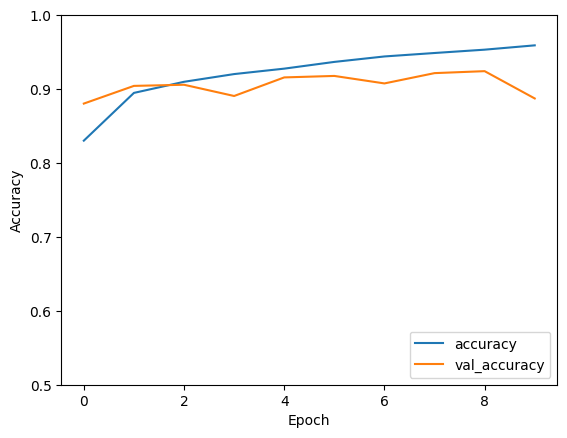

In [78]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [79]:
model.save('F:\Machine learning\Fashion-MNIST\model')

INFO:tensorflow:Assets written to: F:\Machine learning\Fashion-MNIST\model\assets


INFO:tensorflow:Assets written to: F:\Machine learning\Fashion-MNIST\model\assets


In [124]:
model_laod = load_model('F:\Machine learning\MINST_Fashion\model')

In [125]:
def get_predictions(X_test):
    # Digits prediction

    predictions = model.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

In [126]:
# Prediction and display it
predictions = get_predictions(X_test)

313/313 [==============================] - 7s 8ms/step


In [135]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Predict

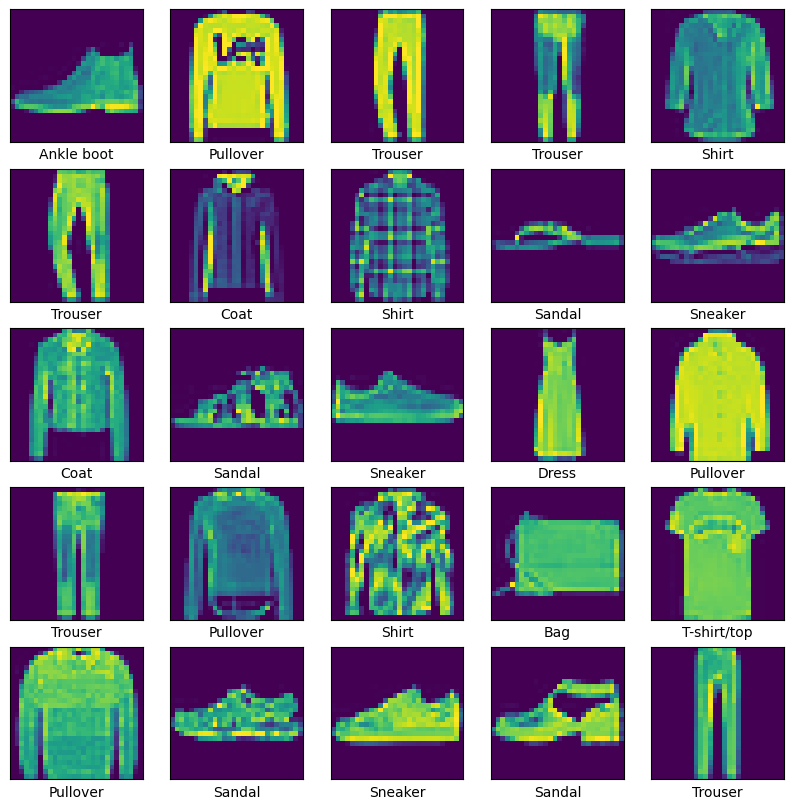

In [84]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(classes[predictions[i]])
plt.show()

### Wrong Predict

In [96]:
def pred_wrong_display_MNIST_Fashion(X_test, predictions, Y_test):
    X_test_wrong = []
    predictions_wrong = []
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.argmax(Y_test[i]))
        if predictions[i] != Y_test_pred[i]:
            X_test_wrong.append(X_test[i])
            predictions_wrong.append(predictions[i])

    return Y_test_pred, X_test_wrong, predictions_wrong

In [98]:
Y_test_pred, X_test_wrong, predictions_wrong = pred_wrong_display_MNIST_Fashion(X_test, predictions, Y_test)

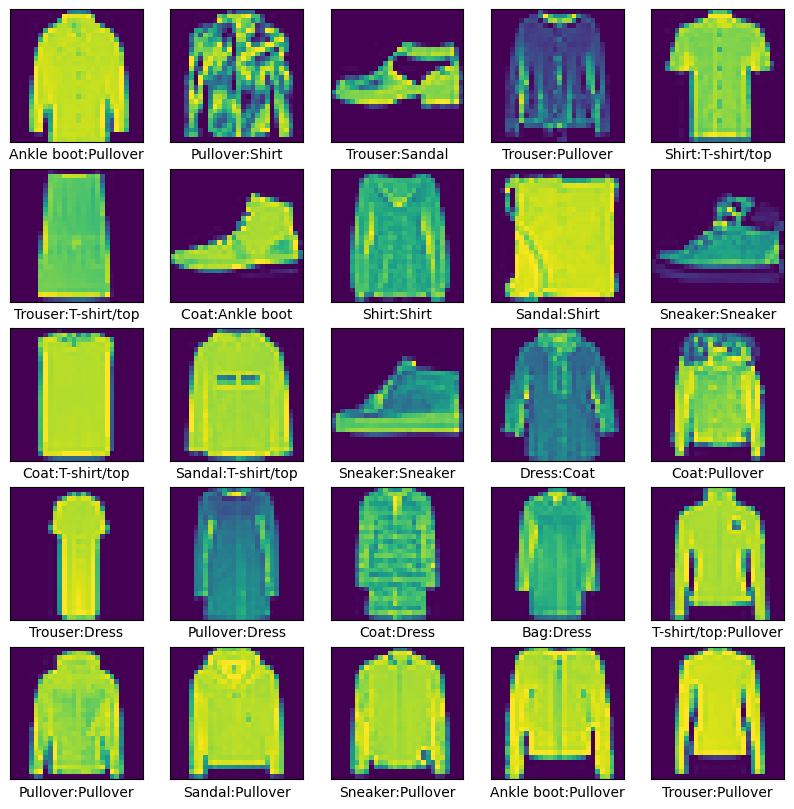

In [110]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_wrong[i])
    plt.xlabel('{}:{}'.format(classes[Y_test_pred[i]], classes[predictions_wrong[i]]))
plt.show()

### Compare metrics

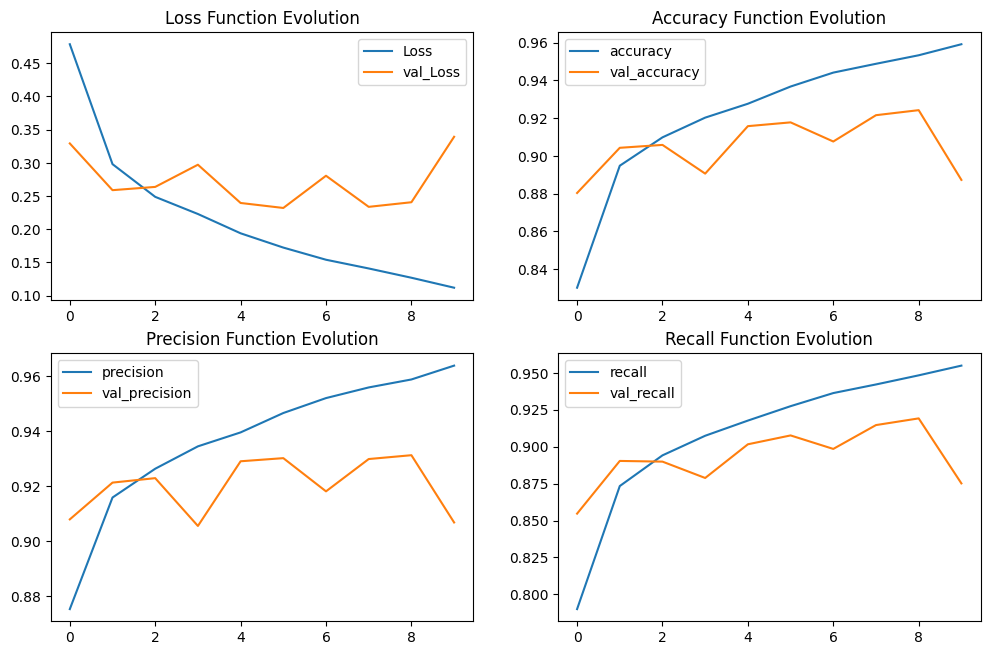

In [111]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [137]:
import matplotlib.image as img
import cv2

In [194]:
img_rgb = cv2.imread('C:/Users/Makhmud/Desktop/Blue_Tshirt.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img_gray, cv2.IMREAD_GRAYSCALE)
img_inverted = cv2.bitwise_not(img)
cv2.imwrite('C:/Users/Makhmud/Desktop/inverted_image.jpg', img_inverted)

True

In [196]:
img_inverted.shape

(255, 220, 4)

In [197]:
img_rgb = cv2.imread('C:/Users/Makhmud/Desktop/Blue_Tshirt.jpg')

# Convert the RGB image to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Invert the pixel values in the grayscale image
img_inverted = cv2.bitwise_not(img_gray)

# Save the inverted grayscale image
cv2.imwrite('path/to/inverted_image1.jpg', img_inverted)

False